In [1]:
import warnings
warnings.filterwarnings("ignore")

# 线性分类SVM

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model,svm
from sklearn.model_selection import train_test_split
# 使用 scikit-learn 自带的 iris 数据集
iris=datasets.load_iris() 
X_train=iris.data
y_train=iris.target
# 分层采样拆分成训练集和测试集，测试集大小为原始数据集大小的 1/4
X_train,X_test,y_train,y_test=train_test_split(X_train, y_train,test_size=0.25,
                                                random_state=0,stratify=y_train) 
# 测试 LinearSVC 的用法
def test_LinearSVC(*data):
    X_train,X_test,y_train,y_test=data
    cls=svm.LinearSVC()
    cls.fit(X_train,y_train)
    print('Coefficients:%s, intercept %s'%(cls.coef_,cls.intercept_))
    print('Score: %.2f' % cls.score(X_test, y_test))
test_LinearSVC(X_train,X_test,y_train,y_test) 

Coefficients:[[ 0.20959442  0.39924011 -0.81739079 -0.44231989]
 [-0.1048084  -0.79788432  0.5019975  -1.04753828]
 [-0.80306474 -0.87615938  1.21378552  1.81011772]], intercept [ 0.11973824  2.05348646 -1.44399209]
Score: 0.97


E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [3]:
cls=svm.LinearSVC()
??cls

In [4]:
# 测试 LinearSVC 的预测性能随损失函数的影响
def test_LinearSVC_loss(*data):
    X_train,X_test,y_train,y_test=data
    losses=['hinge','squared_hinge']
    for loss in losses:
        cls=svm.LinearSVC(loss=loss)
        cls.fit(X_train,y_train)
        print("Loss:%s"%loss)
        print('Coefficients:%s, intercept %s'%(cls.coef_,cls.intercept_))
        print('Score: %.2f' % cls.score(X_test, y_test))
test_LinearSVC_loss(X_train,X_test,y_train,y_test)

Loss:hinge
Coefficients:[[ 0.36635871  0.32163842 -1.0753349  -0.57004485]
 [ 0.45498975 -1.52595346  0.41886916 -1.40650551]
 [-1.21546367 -1.15005521  1.85584994  1.97536581]], intercept [ 0.18049881  1.35570969 -1.43792784]
Score: 0.97
Loss:squared_hinge
Coefficients:[[ 0.2095936   0.3992405  -0.81739005 -0.44231798]
 [-0.12225175 -0.78767304  0.52348668 -1.05249262]
 [-0.80316104 -0.87620104  1.2137693   1.80993649]], intercept [ 0.11973932  2.04040771 -1.44378671]
Score: 0.97


E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [5]:
# 测试 LinearSVC 的预测性能随正则化形式的影响
def test_LinearSVC_L12(*data):
    X_train,X_test,y_train,y_test=data
    L12=['l1','l2']
    for p in L12:
        cls=svm.LinearSVC(penalty=p,dual=False)
        cls.fit(X_train,y_train)
        print("penalty:%s"%p)
        print('Coefficients:%s, intercept %s'%(cls.coef_,cls.intercept_))
        print('Score: %.2f' % cls.score(X_test, y_test))
test_LinearSVC_L12(X_train,X_test,y_train,y_test)

penalty:l1
Coefficients:[[ 0.18670825  0.49174601 -0.94641184  0.        ]
 [-0.14702164 -0.9131701   0.48852844 -0.96901107]
 [-0.55071799 -0.85322778  0.94316178  2.3405957 ]], intercept [ 0.          2.59080933 -2.63426486]
Score: 0.95


E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


penalty:l2
Coefficients:[[ 0.20966872  0.39922528 -0.81739501 -0.44237636]
 [-0.12586721 -0.79341553  0.52877475 -1.05556047]
 [-0.80310102 -0.8765723   1.2139247   1.81023784]], intercept [ 0.1194489   2.05948648 -1.44408141]
Score: 0.95


E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\Anaconda3\lib\site-packages\skle

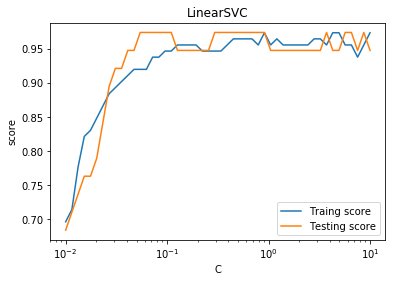

In [6]:
# 测试 LinearSVC 的预测性能随参数 C 的影响
def test_LinearSVC_C(*data):
    X_train,X_test,y_train,y_test=data
    Cs=np.logspace(-2,1)
    train_scores=[]
    test_scores=[]
    for C in Cs:
        cls=svm.LinearSVC(C=C)
        cls.fit(X_train,y_train)
        train_scores.append(cls.score(X_train,y_train))
        test_scores.append(cls.score(X_test,y_test))

    ## 绘图
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    ax.plot(Cs,train_scores,label="Traing score")
    ax.plot(Cs,test_scores,label="Testing score")
    ax.set_xlabel(r"C")
    ax.set_ylabel(r"score")
    ax.set_xscale('log')
    ax.set_title("LinearSVC")
    ax.legend(loc='best')
    plt.show()
test_LinearSVC_C(X_train,X_test,y_train,y_test)

# 非线性分类SVM

In [7]:
# 测试 SVC 的用法,使用最简单的线性核
def test_SVC_linear(*data):
    X_train,X_test,y_train,y_test=data
    cls=svm.SVC(kernel='linear')
    cls.fit(X_train,y_train)
    print('Coefficients:%s, intercept %s'%(cls.coef_,cls.intercept_))
    print('Score: %.2f' % cls.score(X_test, y_test))
test_SVC_linear(X_train,X_test,y_train,y_test)

Coefficients:[[-0.16990304  0.47442881 -0.93075307 -0.51249447]
 [ 0.02439178  0.21890135 -0.52833486 -0.25913786]
 [ 0.52289771  0.95783924 -1.82516872 -2.00292778]], intercept [2.0368826 1.1512924 6.3276538]
Score: 1.00


In [11]:
cls=svm.SVC(kernel='linear')
??cls

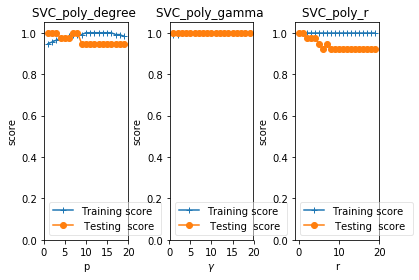

In [8]:
#   测试多项式核的 SVC 的预测性能随 degree、gamma、coef0 的影响
def test_SVC_poly(*data):
    X_train,X_test,y_train,y_test=data
    fig=plt.figure()
    ### 测试 degree ####
    degrees=range(1,20)
    train_scores=[]
    test_scores=[]
    for degree in degrees:
        cls=svm.SVC(kernel='poly',degree=degree)
        cls.fit(X_train,y_train)
        train_scores.append(cls.score(X_train,y_train))
        test_scores.append(cls.score(X_test, y_test))
    ax=fig.add_subplot(1,3,1) # 一行三列
    ax.plot(degrees,train_scores,label="Training score ",marker='+' )
    ax.plot(degrees,test_scores,label= " Testing  score ",marker='o' )
    ax.set_title( "SVC_poly_degree ")
    ax.set_xlabel("p")
    ax.set_ylabel("score")
    ax.set_ylim(0,1.05)
    ax.legend(loc="best",framealpha=0.5)

    ### 测试 gamma ，此时 degree 固定为 3####
    gammas=range(1,20)
    train_scores=[]
    test_scores=[]
    for gamma in gammas:
        cls=svm.SVC(kernel='poly',gamma=gamma,degree=3)
        cls.fit(X_train,y_train)
        train_scores.append(cls.score(X_train,y_train))
        test_scores.append(cls.score(X_test, y_test))
    ax=fig.add_subplot(1,3,2)
    ax.plot(gammas,train_scores,label="Training score ",marker='+' )
    ax.plot(gammas,test_scores,label= " Testing  score ",marker='o' )
    ax.set_title( "SVC_poly_gamma ")
    ax.set_xlabel(r"$\gamma$")
    ax.set_ylabel("score")
    ax.set_ylim(0,1.05)
    ax.legend(loc="best",framealpha=0.5)
    ### 测试 r ，此时 gamma固定为10 ， degree 固定为 3######
    rs=range(0,20)
    train_scores=[]
    test_scores=[]
    for r in rs:
        cls=svm.SVC(kernel='poly',gamma=10,degree=3,coef0=r)
        cls.fit(X_train,y_train)
        train_scores.append(cls.score(X_train,y_train))
        test_scores.append(cls.score(X_test, y_test))
    ax=fig.add_subplot(1,3,3)
    ax.plot(rs,train_scores,label="Training score ",marker='+' )
    ax.plot(rs,test_scores,label= " Testing  score ",marker='o' )
    ax.set_title( "SVC_poly_r ")
    ax.set_xlabel(r"r")
    ax.set_ylabel("score")
    ax.set_ylim(0,1.05)
    ax.legend(loc="best",framealpha=0.5)
    plt.subplots_adjust(wspace=0.5)
    plt.show()
test_SVC_poly(X_train,X_test,y_train,y_test)

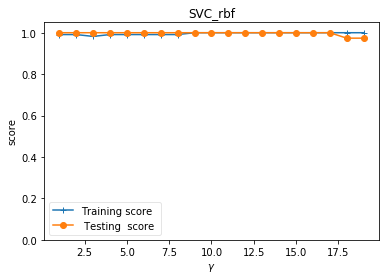

In [13]:
# 测试 高斯核的 SVC 的预测性能随 gamma 参数的影响
def test_SVC_rbf(*data):
    X_train,X_test,y_train,y_test=data
    gammas=range(1,20)
    train_scores=[]
    test_scores=[]
    for gamma in gammas:
        cls=svm.SVC(kernel='rbf',gamma=gamma)
        cls.fit(X_train,y_train)
        train_scores.append(cls.score(X_train,y_train))
        test_scores.append(cls.score(X_test, y_test))
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    ax.plot(gammas,train_scores,label="Training score ",marker='+' )
    ax.plot(gammas,test_scores,label= " Testing  score ",marker='o' )
    ax.set_title( "SVC_rbf")
    ax.set_xlabel(r"$\gamma$")
    ax.set_ylabel("score")
    ax.set_ylim(0,1.05)
    ax.legend(loc="best",framealpha=0.5)
    plt.show()
test_SVC_rbf(X_train,X_test,y_train,y_test)

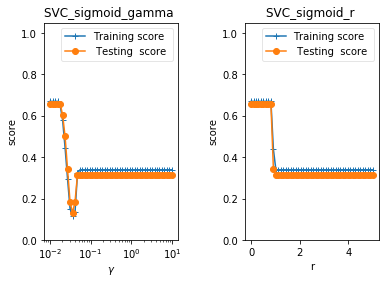

In [9]:
# 测试 sigmoid 核的 SVC 的预测性能随 gamma、coef0 的影响
def test_SVC_sigmoid(*data):
    X_train,X_test,y_train,y_test=data
    fig=plt.figure()

    ### 测试 gamma ，固定 coef0 为 0 ####
    gammas=np.logspace(-2,1)
    train_scores=[]
    test_scores=[]

    for gamma in gammas:
        cls=svm.SVC(kernel='sigmoid',gamma=gamma,coef0=0)
        cls.fit(X_train,y_train)
        train_scores.append(cls.score(X_train,y_train))
        test_scores.append(cls.score(X_test, y_test))
    ax=fig.add_subplot(1,2,1)
    ax.plot(gammas,train_scores,label="Training score ",marker='+' )
    ax.plot(gammas,test_scores,label= " Testing  score ",marker='o' )
    ax.set_title( "SVC_sigmoid_gamma ")
    ax.set_xscale("log")
    ax.set_xlabel(r"$\gamma$")
    ax.set_ylabel("score")
    ax.set_ylim(0,1.05)
    ax.legend(loc="best",framealpha=0.5)
    ### 测试 r，固定 gamma 为 0.01 ######
    rs=np.linspace(0,5)
    train_scores=[]
    test_scores=[]

    for r in rs:
        cls=svm.SVC(kernel='sigmoid',coef0=r,gamma=0.01)
        cls.fit(X_train,y_train)
        train_scores.append(cls.score(X_train,y_train))
        test_scores.append(cls.score(X_test, y_test))
    ax=fig.add_subplot(1,2,2)
    ax.plot(rs,train_scores,label="Training score ",marker='+' )
    ax.plot(rs,test_scores,label= " Testing  score ",marker='o' )
    ax.set_title( "SVC_sigmoid_r ")
    ax.set_xlabel(r"r")
    ax.set_ylabel("score")
    ax.set_ylim(0,1.05)
    ax.legend(loc="best",framealpha=0.5)
    plt.subplots_adjust(wspace=0.5)
    plt.show()
test_SVC_sigmoid(X_train,X_test,y_train,y_test)

# 线性回归SVR

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model,svm
from sklearn.model_selection import train_test_split
#使用 scikit-learn 自带的一个糖尿病病人的数据集
diabetes = datasets.load_diabetes() 
# 拆分成训练集和测试集，测试集大小为原始数据集大小的 1/4
X_train,X_test,y_train,y_test=train_test_split(diabetes.data,diabetes.target,
                test_size=0.25,random_state=0)
#  测试 LinearSVR 的用法
def test_LinearSVR(*data):
    X_train,X_test,y_train,y_test=data
    regr=svm.LinearSVR()
    regr.fit(X_train,y_train)
    print('Coefficients:%s, intercept %s'%(regr.coef_,regr.intercept_))
    print('Score: %.2f' % regr.score(X_test, y_test))
test_LinearSVR(X_train,X_test,y_train,y_test)

Coefficients:[ 2.14940259  0.4418875   6.35258779  4.62357282  2.82085901  2.42005063
 -5.3367464   5.41765142  7.26812843  4.33778867], intercept [99.]
Score: -0.56


In [19]:
regr=svm.LinearSVR()
??regr

In [20]:
# 测试 LinearSVR 的预测性能随不同损失函数的影响
def test_LinearSVR_loss(*data):
    X_train,X_test,y_train,y_test=data
    losses=['epsilon_insensitive','squared_epsilon_insensitive']
    for loss in losses:
        regr=svm.LinearSVR(loss=loss)
        regr.fit(X_train,y_train)
        print("loss：%s"%loss)
        print('Coefficients:%s, intercept %s'%(regr.coef_,regr.intercept_))
        print('Score: %.2f' % regr.score(X_test, y_test))
test_LinearSVR_loss(X_train,X_test,y_train,y_test)

loss：epsilon_insensitive
Coefficients:[ 2.14940259  0.4418875   6.35258779  4.62357282  2.82085901  2.42005063
 -5.3367464   5.41765142  7.26812843  4.33778867], intercept [99.]
Score: -0.56
loss：squared_epsilon_insensitive
Coefficients:[   7.04932202 -103.32761629  395.67498761  221.76261884  -11.07933753
  -63.55434165 -176.67645628  117.56216444  322.63424656   95.61512766], intercept [152.37276454]
Score: 0.38


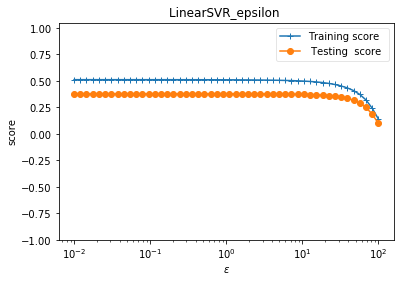

In [21]:
# 测试 LinearSVR 的预测性能随 epsilon 参数的影响
def test_LinearSVR_epsilon(*data):
    X_train,X_test,y_train,y_test=data
    epsilons=np.logspace(-2,2)
    train_scores=[]
    test_scores=[]
    for  epsilon in  epsilons:
        regr=svm.LinearSVR(epsilon=epsilon,loss='squared_epsilon_insensitive')
        regr.fit(X_train,y_train)
        train_scores.append(regr.score(X_train, y_train))
        test_scores.append(regr.score(X_test, y_test))
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    ax.plot(epsilons,train_scores,label="Training score ",marker='+' )
    ax.plot(epsilons,test_scores,label= " Testing  score ",marker='o' )
    ax.set_title( "LinearSVR_epsilon ")
    ax.set_xscale("log")
    ax.set_xlabel(r"$\epsilon$")
    ax.set_ylabel("score")
    ax.set_ylim(-1,1.05)
    ax.legend(loc="best",framealpha=0.5)
    plt.show()
test_LinearSVR_epsilon(X_train,X_test,y_train,y_test)

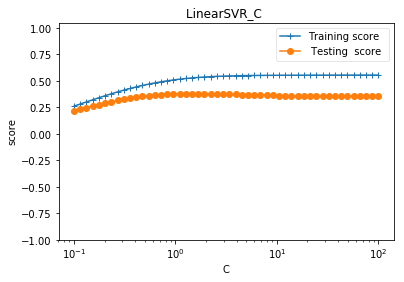

In [22]:
# 测试 LinearSVR 的预测性能随 C 参数的影响
def test_LinearSVR_C(*data):
    X_train,X_test,y_train,y_test=data
    Cs=np.logspace(-1,2)
    train_scores=[]
    test_scores=[]
    for  C in  Cs:
        regr=svm.LinearSVR(epsilon=0.1,loss='squared_epsilon_insensitive',C=C)
        regr.fit(X_train,y_train)
        train_scores.append(regr.score(X_train, y_train))
        test_scores.append(regr.score(X_test, y_test))
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    ax.plot(Cs,train_scores,label="Training score ",marker='+' )
    ax.plot(Cs,test_scores,label= " Testing  score ",marker='o' )
    ax.set_title( "LinearSVR_C ")
    ax.set_xscale("log")
    ax.set_xlabel(r"C")
    ax.set_ylabel("score")
    ax.set_ylim(-1,1.05)
    ax.legend(loc="best",framealpha=0.5)
    plt.show()
test_LinearSVR_C(X_train,X_test,y_train,y_test)

# 非线性回归SVR

In [24]:
# 测试 SVR 的用法。这里使用最简单的线性核
def test_SVR_linear(*data):
    X_train,X_test,y_train,y_test=data
    regr=svm.SVR(kernel='linear')
    regr.fit(X_train,y_train)
    print('Coefficients:%s, intercept %s'%(regr.coef_,regr.intercept_))
    print('Score: %.2f' % regr.score(X_test, y_test))
test_SVR_linear(X_train,X_test,y_train,y_test)

Coefficients:[[ 2.24127622 -0.38128702  7.87018376  5.21135861  2.26619436  1.70869458
  -5.7746489   5.51487251  7.94860817  4.59359657]], intercept [137.11012796]
Score: -0.03


In [27]:
regr=svm.SVR(kernel='linear')
help(regr)

Help on SVR in module sklearn.svm.classes object:

class SVR(sklearn.svm.base.BaseLibSVM, sklearn.base.RegressorMixin)
 |  SVR(kernel='rbf', degree=3, gamma='auto_deprecated', coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=-1)
 |  
 |  Epsilon-Support Vector Regression.
 |  
 |  The free parameters in the model are C and epsilon.
 |  
 |  The implementation is based on libsvm.
 |  
 |  Read more in the :ref:`User Guide <svm_regression>`.
 |  
 |  Parameters
 |  ----------
 |  kernel : string, optional (default='rbf')
 |       Specifies the kernel type to be used in the algorithm.
 |       It must be one of 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed' or
 |       a callable.
 |       If none is given, 'rbf' will be used. If a callable is given it is
 |       used to precompute the kernel matrix.
 |  
 |  degree : int, optional (default=3)
 |      Degree of the polynomial kernel function ('poly').
 |      Ignored by all other kernel

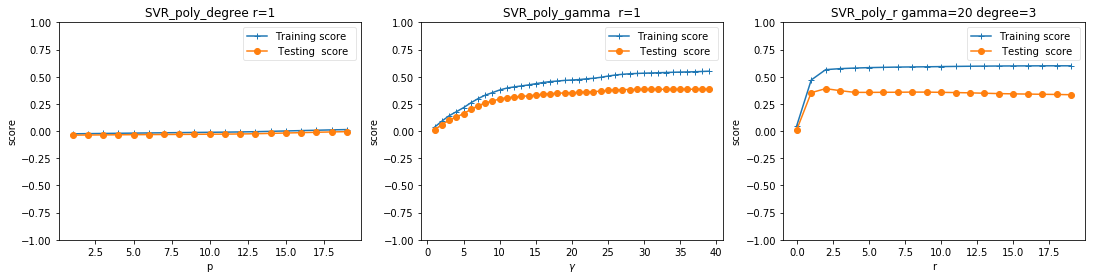

In [33]:
# 测试 多项式核的 SVR 的预测性能随  degree、gamma、coef0 的影响
def test_SVR_poly(*data):
    X_train,X_test,y_train,y_test=data
    fig=plt.figure()
    ### 测试 degree ####
    degrees=range(1,20)
    train_scores=[]
    test_scores=[]
    for degree in degrees:
        regr=svm.SVR(kernel='poly',degree=degree,coef0=1)
        regr.fit(X_train,y_train)
        train_scores.append(regr.score(X_train,y_train))
        test_scores.append(regr.score(X_test, y_test))
    ax=fig.add_subplot(1,3,1)
    ax.plot(degrees,train_scores,label="Training score ",marker='+' )
    ax.plot(degrees,test_scores,label= " Testing  score ",marker='o' )
    ax.set_title( "SVR_poly_degree r=1")
    ax.set_xlabel("p")
    ax.set_ylabel("score")
    ax.set_ylim(-1,1.)
    ax.legend(loc="best",framealpha=0.5)

    ### 测试 gamma，固定 degree为3， coef0 为 1 ####
    gammas=range(1,40)
    train_scores=[]
    test_scores=[]
    for gamma in gammas:
        regr=svm.SVR(kernel='poly',gamma=gamma,degree=3,coef0=1)
        regr.fit(X_train,y_train)
        train_scores.append(regr.score(X_train,y_train))
        test_scores.append(regr.score(X_test, y_test))
    ax=fig.add_subplot(1,3,2)
    ax.plot(gammas,train_scores,label="Training score ",marker='+' )
    ax.plot(gammas,test_scores,label= " Testing  score ",marker='o' )
    ax.set_title( "SVR_poly_gamma  r=1")
    ax.set_xlabel(r"$\gamma$")
    ax.set_ylabel("score")
    ax.set_ylim(-1,1)
    ax.legend(loc="best",framealpha=0.5)
    ### 测试 r，固定 gamma 为 20，degree为 3 ######
    rs=range(0,20)
    train_scores=[]
    test_scores=[]
    for r in rs:
        regr=svm.SVR(kernel='poly',gamma=20,degree=3,coef0=r)
        regr.fit(X_train,y_train)
        train_scores.append(regr.score(X_train,y_train))
        test_scores.append(regr.score(X_test, y_test))
    ax=fig.add_subplot(1,3,3)
    ax.plot(rs,train_scores,label="Training score ",marker='+' )
    ax.plot(rs,test_scores,label= " Testing  score ",marker='o' )
    ax.set_title( "SVR_poly_r gamma=20 degree=3")
    ax.set_xlabel(r"r")
    ax.set_ylabel("score")
    ax.set_ylim(-1,1.)
    ax.legend(loc="best",framealpha=0.5)
    plt.subplots_adjust(right=2.5)
    plt.show()
test_SVR_poly(X_train,X_test,y_train,y_test)

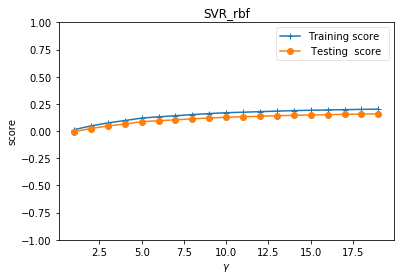

In [35]:
# 测试 高斯核的 SVR 的预测性能随 gamma 参数的影响
def test_SVR_rbf(*data):
    X_train,X_test,y_train,y_test=data
    gammas=range(1,20)
    train_scores=[]
    test_scores=[]
    for gamma in gammas:
        regr=svm.SVR(kernel='rbf',gamma=gamma)
        regr.fit(X_train,y_train)
        train_scores.append(regr.score(X_train,y_train))
        test_scores.append(regr.score(X_test, y_test))
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    ax.plot(gammas,train_scores,label="Training score ",marker='+' )
    ax.plot(gammas,test_scores,label= " Testing  score ",marker='o' )
    ax.set_title( "SVR_rbf")
    ax.set_xlabel(r"$\gamma$")
    ax.set_ylabel("score")
    ax.set_ylim(-1,1)
    ax.legend(loc="best",framealpha=0.5)
    plt.show()
test_SVR_rbf(X_train,X_test,y_train,y_test)

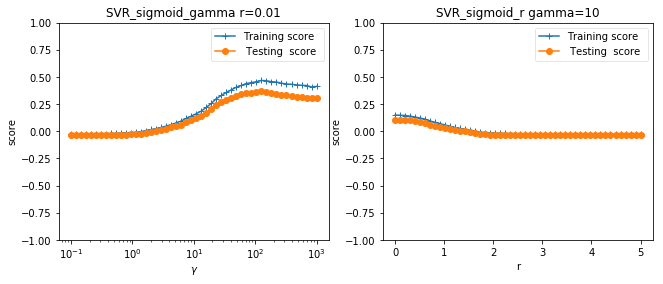

In [37]:
# 测试 sigmoid 核的 SVR 的预测性能随 gamma、coef0 的影响
def test_SVR_sigmoid(*data):
    X_train,X_test,y_train,y_test=data
    fig=plt.figure()

    ### 测试 gammam，固定 coef0 为 0.01 ####
    gammas=np.logspace(-1,3)
    train_scores=[]
    test_scores=[]

    for gamma in gammas:
        regr=svm.SVR(kernel='sigmoid',gamma=gamma,coef0=0.01)
        regr.fit(X_train,y_train)
        train_scores.append(regr.score(X_train,y_train))
        test_scores.append(regr.score(X_test, y_test))
    ax=fig.add_subplot(1,2,1)
    ax.plot(gammas,train_scores,label="Training score ",marker='+' )
    ax.plot(gammas,test_scores,label= " Testing  score ",marker='o' )
    ax.set_title( "SVR_sigmoid_gamma r=0.01")
    ax.set_xscale("log")
    ax.set_xlabel(r"$\gamma$")
    ax.set_ylabel("score")
    ax.set_ylim(-1,1)
    ax.legend(loc="best",framealpha=0.5)
    ### 测试 r ，固定 gamma 为 10 ######
    rs=np.linspace(0,5)
    train_scores=[]
    test_scores=[]

    for r in rs:
        regr=svm.SVR(kernel='sigmoid',coef0=r,gamma=10)
        regr.fit(X_train,y_train)
        train_scores.append(regr.score(X_train,y_train))
        test_scores.append(regr.score(X_test, y_test))
    ax=fig.add_subplot(1,2,2)
    ax.plot(rs,train_scores,label="Training score ",marker='+' )
    ax.plot(rs,test_scores,label= " Testing  score ",marker='o' )
    ax.set_title( "SVR_sigmoid_r gamma=10")
    ax.set_xlabel(r"r")
    ax.set_ylabel("score")
    ax.set_ylim(-1,1)
    ax.legend(loc="best",framealpha=0.5)
    plt.subplots_adjust(right=1.5)
    plt.show()
test_SVR_sigmoid(X_train,X_test,y_train,y_test)